In [ ]:
# Mounting the drive to access files
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [ ]:
# Importation of necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import pandas as pd
import random

In [ ]:
# Loading the BMI data file (Target Attribute)
bmiData = pd.read_csv("/gdrive/My Drive/vip_attribute/annotation.csv")

In [ ]:
# Loading the embeddings data vector (Independent image data attributes)
imgData = pd.read_csv("/gdrive/My Drive/vip_attribute/embeddings.csv")

In [ ]:
# 1026 images with 2622 embedding data points
imgData.shape

(1026, 2622)

In [ ]:
# bmi value for 1026 images
bmiData.shape

(1026, 4)

In [ ]:
Y = bmiData['BMI']
X = imgData

In [ ]:
# Rounding to single decimal float values
for i in range(len(Y)):
  Y[i] = round(Y[i],1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Splitting to training and validation data
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.3,random_state = 7)
print(len(X_train))
print(len(X_val))

718
308


Text(0.5, 1.0, 'Validation Set')

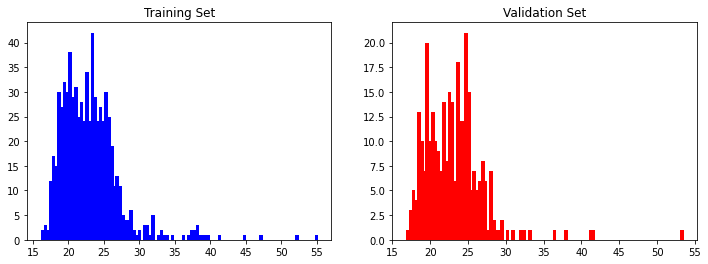

In [ ]:
# Visualising the distribution of the data in the training and validation data sets
num_bins = 100
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(Y_train,bins = num_bins,width = 0.5,color = 'blue')
axes[1].hist(Y_val,bins = num_bins,width = 0.5,color = 'red')
axes[0].set_title('Training Set')
axes[1].set_title('Validation Set')

In [ ]:
# Deep Learning Model
def estimator_model():

  model = Sequential()
  
  # with relu a problem might occur called dead relu that feeds only 0 values to the next layer
  # enough number of dead relus will make the loss stagnant and will not decrease with epochs
  #  using elu activation which has a non zero gradient in the negative section instead of 0 in relu

  # when there were only two dropout layers
  # very low difference of 0.02 between the training and the validation loss
  # hence a decently good model is achieved
  # however the very low value of the loss means overfitting hence we have added more dropout layers  
  # but remove dropout layers when training loss is significantly greater than validation loss


  model.add(Dense(1024, activation ='elu', input_dim=2622))

  model.add(Dense(128, activation ='elu'))  
  model.add(Dense(128, activation ='elu'))  
  model.add(Dropout(0.3))

  model.add(Dense(64, activation ='elu'))
  model.add(Dense(64, activation ='elu'))  
  model.add(Dropout(0.1))

  model.add(Dense(16, activation ='elu'))

  model.add(Dense(1))
  
  optimizer= Adam(lr=1e-4)
  
  model.compile(loss='mse', optimizer=optimizer)
  
  return model

In [ ]:
# Model details
model = estimator_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2685952   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
# Training and Validation
history = model.fit(x=X_train, y=Y_train, batch_size=10, epochs=100, verbose=1, callbacks=None, 
                    validation_split=0.1, validation_data=(X_val,Y_val), shuffle=True,
                    initial_epoch=0, steps_per_epoch=10, validation_batch_size=10, 
                    )

Epoch 1/100
10/10 [==============================] - 0s 36ms/step - loss: 322.0273 - val_loss: 141.6158
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 86.1968 - val_loss: 27.8768
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 66.9494 - val_loss: 30.5327
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 60.2988 - val_loss: 20.2319
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 37.8084 - val_loss: 22.5315
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 39.3180 - val_loss: 19.3010
Epoch 7/100
10/10 [==============================] - 0s 16ms/step - loss: 41.0702 - val_loss: 19.0527
Epoch 8/100
10/10 [==============================] - 0s 16ms/step - loss: 51.2695 - val_loss: 18.7905
Epoch 9/100
10/10 [==============================] - 0s 16ms/step - loss: 28.0218 - val_loss: 17.5918
Epoch 10/100
10/10 [==============================] - 0s 16ms/step - loss: 44.72

Text(0.5, 0, 'epoch')

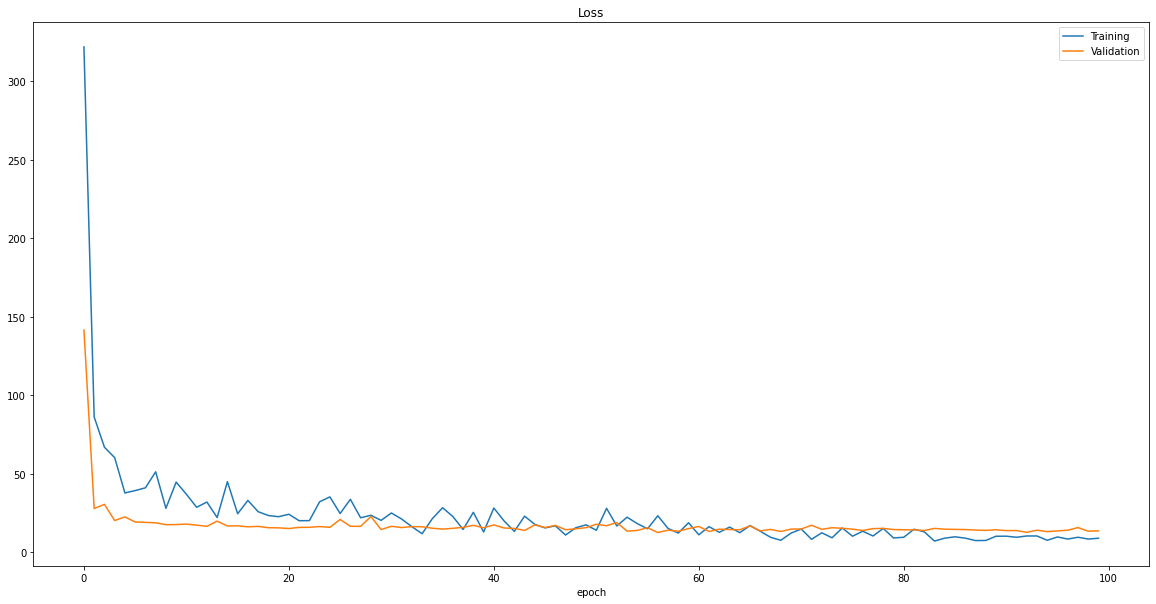

In [ ]:
# Visualising the loss 
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')


In [ ]:
# Model trained on the whole data
history = model.fit(x=X, y=Y, batch_size=10, epochs=100, verbose=1, callbacks=None, validation_split=0.3,
                    steps_per_epoch=10, 
                    )

Epoch 1/100
10/10 [==============================] - 0s 37ms/step - loss: 2.9589 - val_loss: 5.2710
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 3.2463 - val_loss: 4.5433
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 2.5189 - val_loss: 4.2187
Epoch 4/100
10/10 [==============================] - 0s 26ms/step - loss: 3.6688 - val_loss: 6.3231
Epoch 5/100
10/10 [==============================] - 0s 24ms/step - loss: 3.8480 - val_loss: 6.4296
Epoch 6/100
10/10 [==============================] - 0s 26ms/step - loss: 3.7739 - val_loss: 7.8361
Epoch 7/100
10/10 [==============================] - 0s 24ms/step - loss: 3.6633 - val_loss: 4.5223
Epoch 8/100
10/10 [==============================] - 0s 26ms/step - loss: 2.6621 - val_loss: 4.9197
Epoch 9/100
10/10 [==============================] - 0s 23ms/step - loss: 4.5910 - val_loss: 5.8963
Epoch 10/100
10/10 [==============================] - 0s 24ms/step - loss: 2.4806 - val_loss: 6.9797